In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
data = pd.read_csv(
    "data/crisis_portfolio.csv", 
    parse_dates=["Date"]
)
data.sort_values(by="Date", inplace=True)
data.set_index("Date", inplace=True)
data.head()

/var/folders/fn/5k0jcf411lj3q3n_3j3hjwjw0000gn/T/ipykernel_82072/2585305740.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv(


,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,481.799988,55.520000,104.040001,39.009998
2005-01-02,494.799988,57.250000,108.400002,37.500000
2005-01-03,478.799988,56.950001,110.019997,37.090000
2005-01-04,446.200012,56.869999,109.300003,34.250000
2005-01-06,477.200012,50.070000,98.639999,35.759998


Text(0, 0.5, 'Closing Prices, USD')

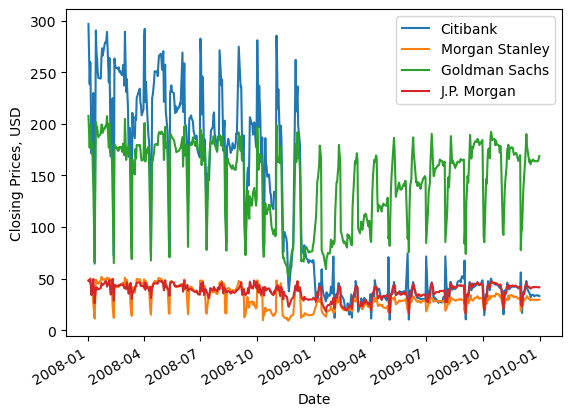

In [6]:
# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = data.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices.plot().set_ylabel("Closing Prices, USD")

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


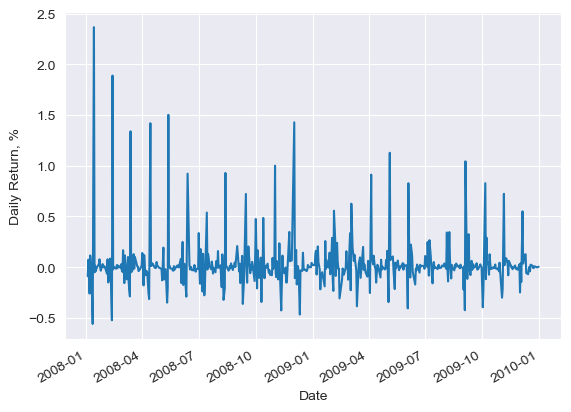

In [8]:

weights = [0.25, 0.25, 0.25, 0.25]

# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)
# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

In [9]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
print(covariance)

                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        45.560868       24.273465      19.507137    12.103384
Morgan Stanley  24.273465       27.961628      20.101853     6.292798
Goldman Sachs   19.507137       20.101853      16.606821     6.309059
J.P. Morgan     12.103384        6.292798       6.309059     6.656119


<Axes: >

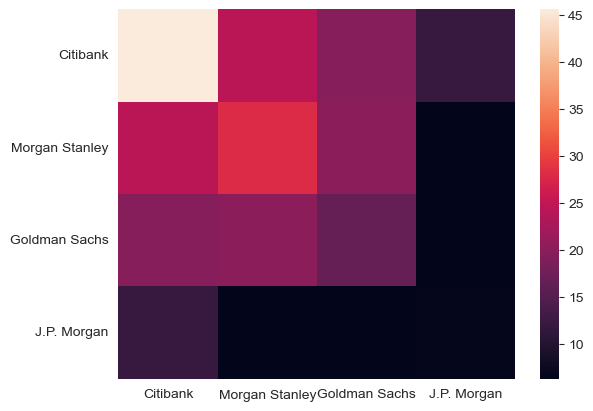

In [10]:
sns.heatmap(covariance)

In [12]:
# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance = np.transpose(np.array(weights).T) @ covariance @ weights
portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

4.13794050711316


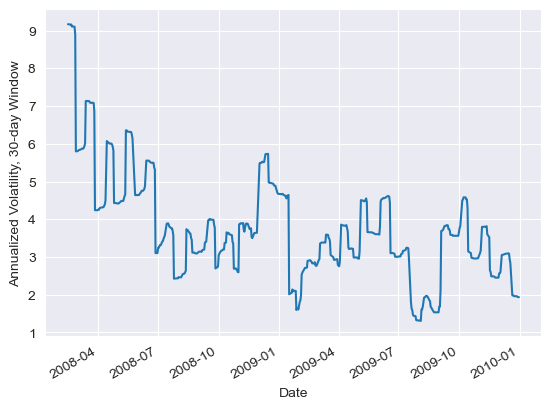

In [13]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

# Risk factors and the financial crisis
